In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import os

notebook_path = os.path.abspath('')
import sys
# Find the part of the path that contains 'commitFit'
commit_fit_path = None
for part in notebook_path.split(os.sep):
    print(part)
    if 'ensemble_commit' in part:
        commit_fit_path = notebook_path.split(part)[0] + part
        print(commit_fit_path)
        break

if commit_fit_path is None:
    raise ValueError("Path containing 'ensemble_commit' not found in notebook path.")


if commit_fit_path not in sys.path:
    sys.path.append(commit_fit_path)

import ensemble_model.preprocesser as preprocesser 
import ensemble_model.MoE_model_smooth_cum_loss as moe 
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, RobertaModel, RobertaTokenizer, DistilBertModel

# import whatthepatch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve,classification_report



root
ensemble_commit
/root/ensemble_commit


In [2]:
# moe.BiLSTMStudent

In [3]:
df = pd.read_json(r'../datasets/patch_db.json', encoding='utf_8_sig')
df.dropna(inplace=True)
label2id={'non-security':0,'security':1}
df = df.replace({"category": label2id})
df

/tmp/ipykernel_5042/183603274.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"category": label2id})


,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source
0,NA,NA,0,540958e2f5a87b81aa5f55ce40b3e2869754f97d,commit 540958e2f5a87b81aa5f55ce40b3e2869754f97...,diff --git a/drivers/staging/comedi/drivers/cb...,stoth68000,media-tree,wild
1,NA,NA,0,64d240b721b21e266ffde645ec965c3b6d1c551f,commit 64d240b721b21e266ffde645ec965c3b6d1c551...,diff --git a/drivers/target/target_core_file.c...,stoth68000,media-tree,wild
2,NA,NA,0,f181dd278274f50e689ebd13237010a90b430164,commit f181dd278274f50e689ebd13237010a90b43016...,diff --git a/include/paths.h b/include/paths.h...,openbsd,src,wild
3,NA,NA,0,0abdc3723b5d33dde698ab941325edec2819c128,commit 0abdc3723b5d33dde698ab941325edec2819c12...,diff --git a/gnu/usr.bin/binutils/ld/lexsup.c ...,openbsd,src,wild
4,NA,NA,0,d7930d7f820e5dd6b07b823f155aeb943b525e16,commit d7930d7f820e5dd6b07b823f155aeb943b525e1...,diff --git a/src/expat_erl.c b/src/expat_erl.c...,esl,MongooseIM,wild
...,...,...,...,...,...,...,...,...,...
35810,CVE-2013-0217,399,1,7d5145d8eb2b9791533ffe4dc003b129b9696c48,From 7d5145d8eb2b9791533ffe4dc003b129b9696c48 ...,diff --git a/drivers/net/xen-netback/netback.c...,torvalds,linux,cve
35811,CVE-2018-18311,119,1,34716e2a6ee2af96078d62b065b7785c001194be,From 34716e2a6ee2af96078d62b065b7785c001194be ...,diff --git a/util.c b/util.c\nindex 7282dd9cfe...,Perl,perl5,cve
35812,CVE-2019-12984,476,1,385097a3675749cbc9e97c085c0e5dfe4269ca51,From 385097a3675749cbc9e97c085c0e5dfe4269ca51 ...,diff --git a/net/nfc/netlink.c b/net/nfc/netli...,torvalds,linux,cve
35813,CVE-2013-0865,119,1,f3d16706060ab6ae6dc78f15359fab3fd87c9495,From f3d16706060ab6ae6dc78f15359fab3fd87c9495 ...,diff --git a/libavcodec/vqavideo.c b/libavcode...,NA,NA,cve


In [4]:
# df['command'] = df['diff'].apply(lambda x : extract_lines(find_longest_list([y.changes for y in whatthepatch.parse_patch(x)])))
# extracted_cols = df['diff'].str.extract(r'^diff --git (?P<source>[^\t\n]+) (?P<target>[^\t\n]+)')
# whatthepatch.apply_diff(diff, lao)

In [5]:
# len(df_dataset)

In [6]:
# df_dataset[0]

In [7]:
# Load BERT and CodeBERT models and tokenizers
bert_model = BertModel.from_pretrained('../models/bert-base-cased')
bert_tokenizer = BertTokenizer.from_pretrained('../models/bert-base-cased')

codebert_model = BertModel.from_pretrained('../models/bert-base-cased')
codebert_tokenizer = BertTokenizer.from_pretrained('../models/bert-base-cased')

Some weights of the model checkpoint at ../models/bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at ../models/bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.wei

In [8]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)
train_data,_ = train_test_split(train_data, train_size=0.1, random_state=42)
test_data, val_data = train_test_split(test_data, train_size=0.1, random_state=42)
val_data, _ = train_test_split(val_data, train_size=0.1, random_state=42)
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)
val_data.reset_index(inplace=True)

In [9]:
train_data['category'].value_counts()

category
0    1644
1     863
Name: count, dtype: int64

In [10]:
val_data

,index,CVE_ID,CWE_ID,category,commit_id,commit_message,diff_code,owner,repo,source
0,26915,NA,NA,1,44241628bb207ec211bebd156aaf69470d90c209,commit 44241628bb207ec211bebd156aaf69470d90c20...,diff --git a/drivers/thermal/power_allocator.c...,stoth68000,media-tree,wild
1,18930,NA,NA,0,fe82772c377e1c0bdb1ce724f8bbe8ceb6294ee1,commit fe82772c377e1c0bdb1ce724f8bbe8ceb6294ee...,diff --git a/core/fork_server.c b/core/fork_se...,unbit,uwsgi,wild
2,15526,NA,NA,0,625c6ace93bb1515ff16840741d6f7567be6ebb8,commit 625c6ace93bb1515ff16840741d6f7567be6ebb...,diff --git a/send.c b/send.c\nindex 2ced24b..9...,reubenhwk,radvd,wild
3,13501,NA,NA,0,8a7cf3febbb2b7c1ade717ddb3065de67c5983c5,commit 8a7cf3febbb2b7c1ade717ddb3065de67c5983c...,diff --git a/drivers/net/wireless/wl12xx/main....,mjg59,linux,wild
4,10592,NA,NA,0,5464baecf521d1ca8095604f5a7371443c94226a,commit 5464baecf521d1ca8095604f5a7371443c94226...,diff --git a/linux-user/syscall.c b/linux-user...,qemu,qemu,wild
...,...,...,...,...,...,...,...,...,...,...
478,12654,NA,NA,0,056790923e1c4eed5d8cc502e1092944a2b23025,commit 056790923e1c4eed5d8cc502e1092944a2b2302...,diff --git a/sound/soc/soc-pcm.c b/sound/soc/s...,stoth68000,media-tree,wild
479,7284,NA,NA,0,53155c0a5949d5cc3bd434d838e5b0c6e0542f9b,commit 53155c0a5949d5cc3bd434d838e5b0c6e0542f9...,diff --git a/drivers/gpu/drm/i915/intel_displa...,torvalds,linux,wild
480,22406,NA,NA,0,7b96dc023a1b487bce59256fde14b8bb28b45aea,commit 7b96dc023a1b487bce59256fde14b8bb28b45ae...,diff --git a/drivers/sbus/char/vfc.h b/drivers...,torvalds,linux,wild
481,26222,NA,NA,1,aa9a4a1edfbd3d223af01db833da2f07850bc655,commit aa9a4a1edfbd3d223af01db833da2f07850bc65...,diff --git a/fs/pstore/ram.c b/fs/pstore/ram.c...,stoth68000,media-tree,wild


In [11]:
# val_data

In [12]:


# Create Datasets and DataLoaders
train_dataset = preprocesser.SentencePairDataset(train_data, bert_tokenizer, codebert_tokenizer, message='commit_message',command='diff_code',label='category')
val_dataset = preprocesser.SentencePairDataset(val_data, bert_tokenizer, codebert_tokenizer, message='commit_message',command='diff_code',label='category')
test_dataset = preprocesser.SentencePairDataset(test_data, bert_tokenizer, codebert_tokenizer, message='commit_message',command='diff_code',label='category')

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)



# # Initialize the model
# model = em.CombinedModel(bert_model, codebert_model, bert_tokenizer, codebert_tokenizer)

# # Train the model
# model.trainer(train_loader, val_loader,num_epochs=10)
# for batch in train_loader:
#     print(batch)

In [13]:
base_model1 = moe.BaseModel(bert_model)
base_model2 = moe.BaseModel(codebert_model)

In [14]:
# Load BERT and CodeBERT models and tokenizers
bert_model = DistilBertModel.from_pretrained('/root/autodl-tmp/IPCK/model/distilbert')

codebert_model = DistilBertModel.from_pretrained('/root/autodl-tmp/IPCK/model/distilbert')

Some weights of the model checkpoint at /root/autodl-tmp/IPCK/model/distilbert were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at /root/autodl-tmp/IPCK/model/distilbert were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you

In [15]:
encoder_model1 = moe.EncoderModel(bert_model)
encoder_model2 = moe.EncoderModel(bert_model)

/root/miniconda3/lib/python3.10/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/10 Loss: 0.6430: 100%|██████████| 314/314 [02:34<00:00,  2.04batch/s]


=============================train========================
Validation Accuracy: 0.7619
Precision: 0.8251
Recall: 0.7619
F1-Score: 0.7165
              precision    recall  f1-score   support

           0     0.7344    1.0000    0.8469       318
           1     1.0000    0.3030    0.4651       165

    accuracy                         0.7619       483
   macro avg     0.8672    0.6515    0.6560       483
weighted avg     0.8251    0.7619    0.7165       483



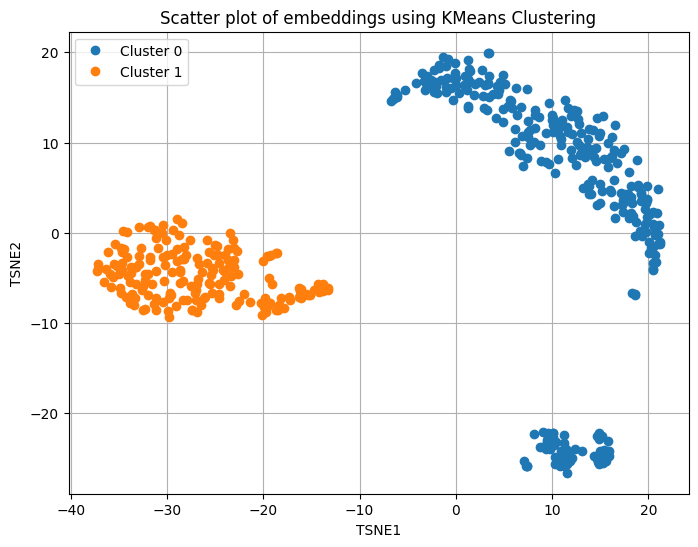

Epoch 2/10 Loss: 0.5779: 100%|██████████| 314/314 [02:34<00:00,  2.03batch/s]


=============================train========================
Validation Accuracy: 0.7867
Precision: 0.8389
Recall: 0.7867
F1-Score: 0.7532
              precision    recall  f1-score   support

           0     0.7553    1.0000    0.8606       318
           1     1.0000    0.3758    0.5463       165

    accuracy                         0.7867       483
   macro avg     0.8777    0.6879    0.7034       483
weighted avg     0.8389    0.7867    0.7532       483



<Figure size 640x480 with 0 Axes>

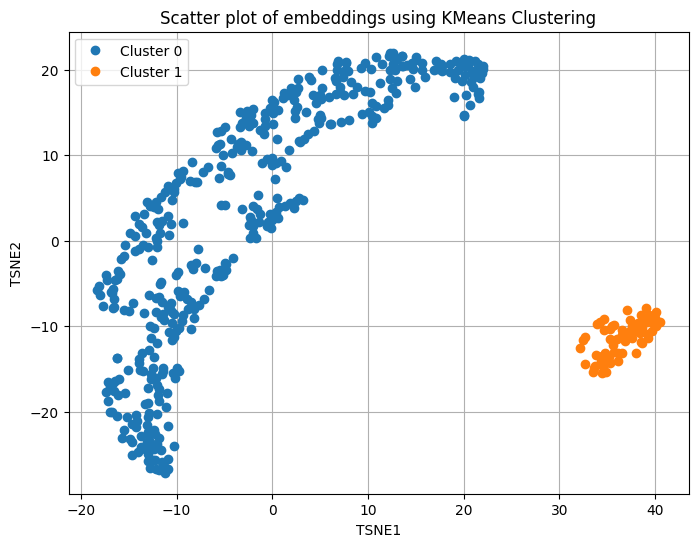

Epoch 3/10 Loss: 0.5120: 100%|██████████| 314/314 [02:31<00:00,  2.08batch/s]


=============================train========================
Validation Accuracy: 0.8157
Precision: 0.8560
Recall: 0.8157
F1-Score: 0.7930
              precision    recall  f1-score   support

           0     0.7813    1.0000    0.8772       318
           1     1.0000    0.4606    0.6307       165

    accuracy                         0.8157       483
   macro avg     0.8907    0.7303    0.7540       483
weighted avg     0.8560    0.8157    0.7930       483



<Figure size 640x480 with 0 Axes>

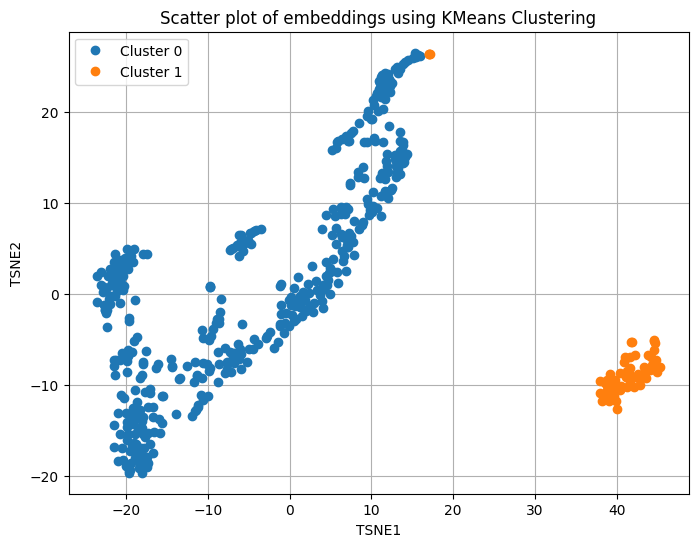

Epoch 4/10 Loss: 0.4299: 100%|██████████| 314/314 [02:31<00:00,  2.07batch/s]


=============================train========================
Validation Accuracy: 0.8219
Precision: 0.8240
Recall: 0.8219
F1-Score: 0.8130
              precision    recall  f1-score   support

           0     0.8169    0.9403    0.8743       318
           1     0.8376    0.5939    0.6950       165

    accuracy                         0.8219       483
   macro avg     0.8273    0.7671    0.7847       483
weighted avg     0.8240    0.8219    0.8130       483



<Figure size 640x480 with 0 Axes>

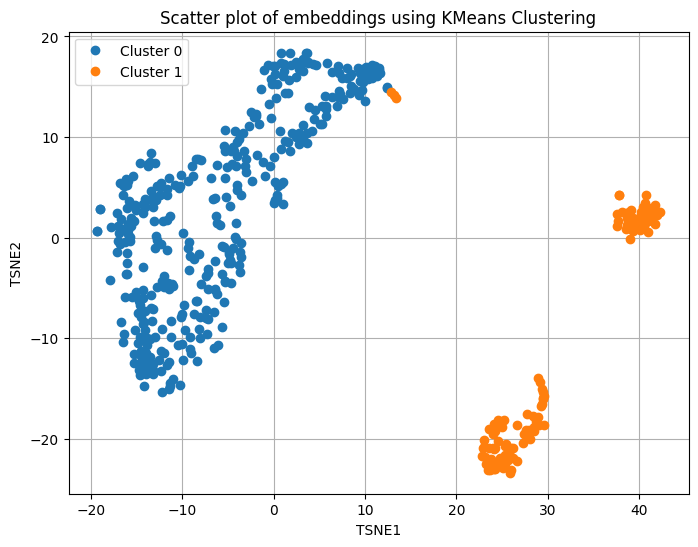

Epoch 5/10 Loss: 0.3591: 100%|██████████| 314/314 [02:26<00:00,  2.14batch/s]


=============================train========================
Validation Accuracy: 0.8799
Precision: 0.8820
Recall: 0.8799
F1-Score: 0.8763
              precision    recall  f1-score   support

           0     0.8714    0.9591    0.9132       318
           1     0.9023    0.7273    0.8054       165

    accuracy                         0.8799       483
   macro avg     0.8868    0.8432    0.8593       483
weighted avg     0.8820    0.8799    0.8763       483



<Figure size 640x480 with 0 Axes>

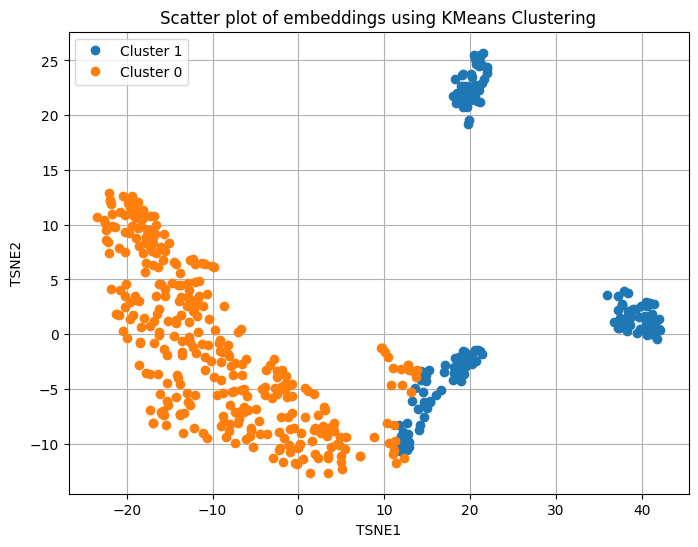

Epoch 6/10 Loss: 0.3013: 100%|██████████| 314/314 [02:30<00:00,  2.08batch/s]


=============================train========================
Validation Accuracy: 0.8820
Precision: 0.8839
Recall: 0.8820
F1-Score: 0.8786
              precision    recall  f1-score   support

           0     0.8739    0.9591    0.9145       318
           1     0.9030    0.7333    0.8094       165

    accuracy                         0.8820       483
   macro avg     0.8885    0.8462    0.8620       483
weighted avg     0.8839    0.8820    0.8786       483



<Figure size 640x480 with 0 Axes>

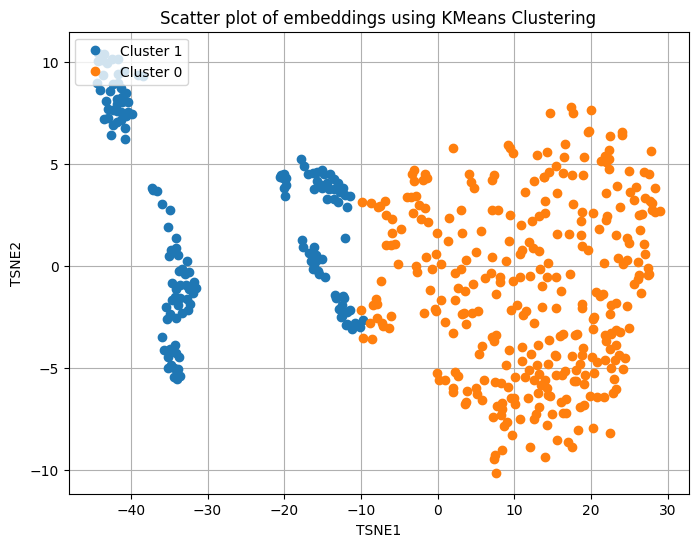

Epoch 7/10 Loss: 0.2244: 100%|██████████| 314/314 [02:28<00:00,  2.11batch/s]


=============================train========================
Validation Accuracy: 0.8778
Precision: 0.8808
Recall: 0.8778
F1-Score: 0.8738
              precision    recall  f1-score   support

           0     0.8669    0.9623    0.9121       318
           1     0.9077    0.7152    0.8000       165

    accuracy                         0.8778       483
   macro avg     0.8873    0.8387    0.8560       483
weighted avg     0.8808    0.8778    0.8738       483



<Figure size 640x480 with 0 Axes>

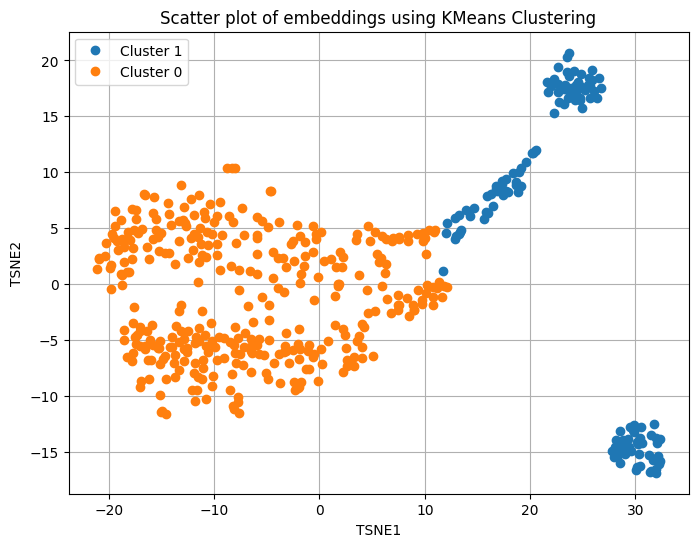

Epoch 8/10 Loss: 0.1731: 100%|██████████| 314/314 [02:30<00:00,  2.08batch/s]


=============================train========================
Validation Accuracy: 0.8447
Precision: 0.8468
Recall: 0.8447
F1-Score: 0.8384
              precision    recall  f1-score   support

           0     0.8384    0.9465    0.8892       318
           1     0.8629    0.6485    0.7405       165

    accuracy                         0.8447       483
   macro avg     0.8507    0.7975    0.8149       483
weighted avg     0.8468    0.8447    0.8384       483



<Figure size 640x480 with 0 Axes>

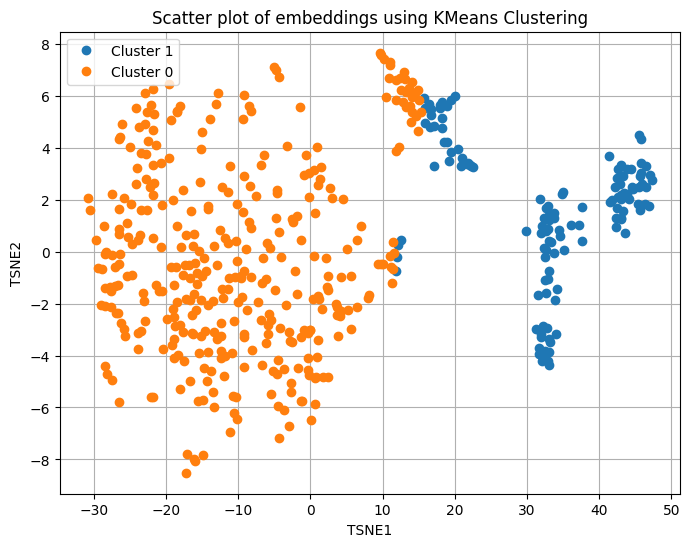

Epoch 9/10 Loss: 0.1078: 100%|██████████| 314/314 [02:30<00:00,  2.08batch/s]


=============================train========================
Validation Accuracy: 0.8551
Precision: 0.8547
Recall: 0.8551
F1-Score: 0.8549
              precision    recall  f1-score   support

           0     0.8875    0.8931    0.8903       318
           1     0.7914    0.7818    0.7866       165

    accuracy                         0.8551       483
   macro avg     0.8395    0.8374    0.8384       483
weighted avg     0.8547    0.8551    0.8549       483



<Figure size 640x480 with 0 Axes>

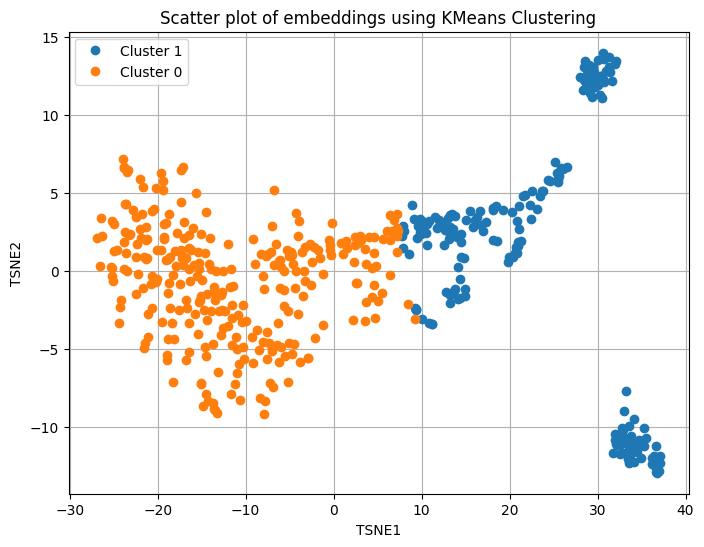

Epoch 10/10 Loss: 0.0522: 100%|██████████| 314/314 [02:31<00:00,  2.08batch/s]


=============================train========================
Validation Accuracy: 0.8468
Precision: 0.8468
Recall: 0.8468
F1-Score: 0.8468
              precision    recall  f1-score   support

           0     0.8836    0.8836    0.8836       318
           1     0.7758    0.7758    0.7758       165

    accuracy                         0.8468       483
   macro avg     0.8297    0.8297    0.8297       483
weighted avg     0.8468    0.8468    0.8468       483



<Figure size 640x480 with 0 Axes>

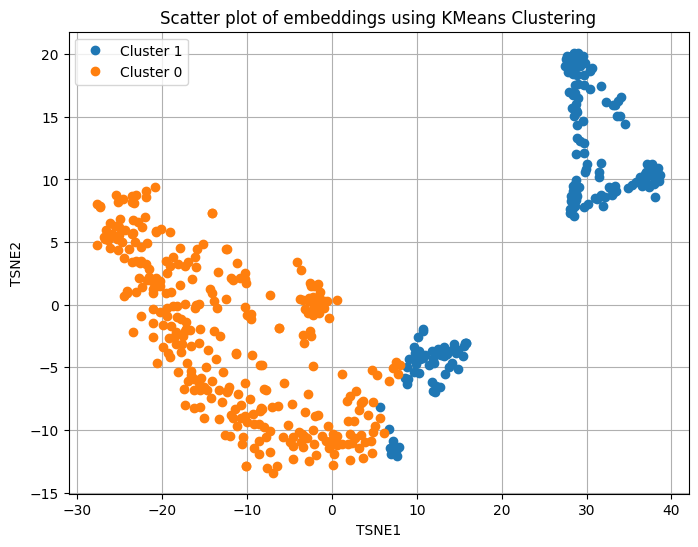

<Figure size 640x480 with 0 Axes>

In [16]:
# Create stacking model
moe_model = moe.MoEModel(base_model1, base_model2)
# Train the model
moe_model.trainer(train_loader, val_loader,num_epochs=10, patience=3)

In [17]:
test_dataset = preprocesser.SentencePairDataset(test_data, bert_tokenizer, codebert_tokenizer,message='commit_message',command='diff_code',label='category')
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

Validation Accuracy: 0.8827
Precision: 0.8822
Recall: 0.8827
F1-Score: 0.8824
              precision    recall  f1-score   support

           0     0.9115    0.9189    0.9152       370
           1     0.8171    0.8024    0.8097       167

    accuracy                         0.8827       537
   macro avg     0.8643    0.8607    0.8624       537
weighted avg     0.8822    0.8827    0.8824       537



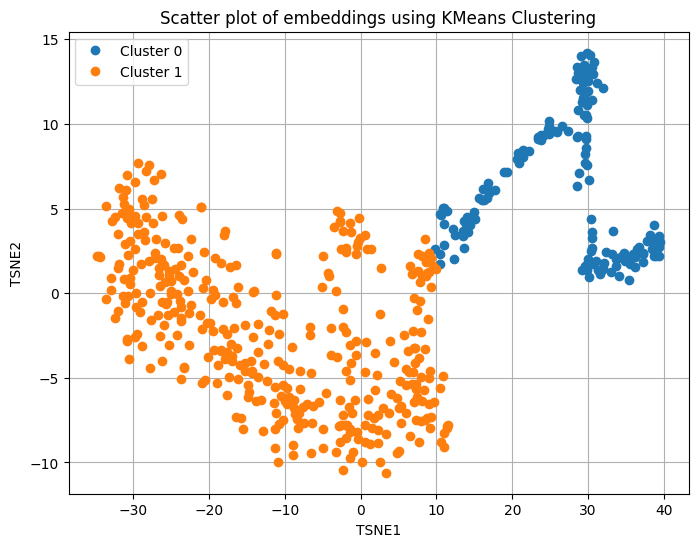

<Figure size 640x480 with 0 Axes>

In [18]:
test_acc, test_labels, test_probabilities, test_embeddings, test_predictions = moe_model.evaluate(test_loader)

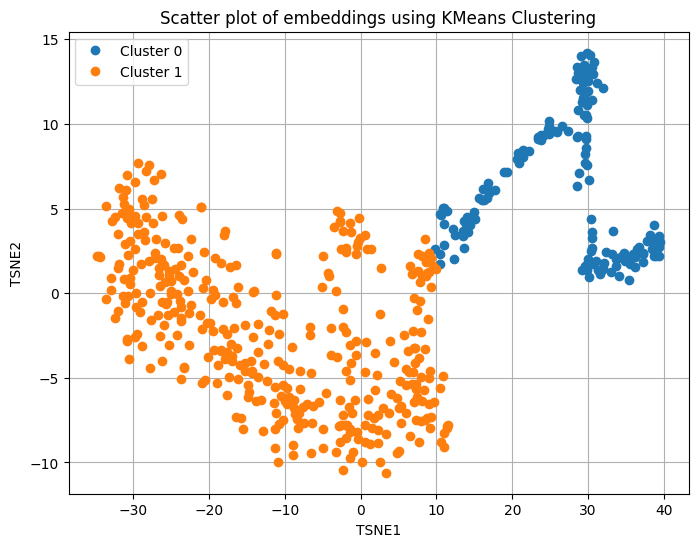

<Figure size 640x480 with 0 Axes>

In [19]:
moe_model.plot_tsne(test_embeddings,test_labels)

In [20]:
torch.save(moe_model, "smooth_cum_entire_bert_model-1-12.pth")

In [21]:
# moe_model = torch.load("smooth_cum_entire_bert_model.pth")                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [22]:
# train_student_model

In [23]:
#发送多种类型的邮件
from email.mime.multipart import MIMEMultipart
import smtplib

from email.mime.text import MIMEText
msg_from = '915803745@qq.com'  # 发送方邮箱
passwd = 'vcuosuurrgkfbdai'   #就是上面的授权码
 
# to= ['g.zhang@gotion.com', 'j.tong@gotion.com'] #接受方邮箱
to= ['j.tong@gotion.com'] #接受方邮箱
#设置邮件内容
#MIMEMultipart类可以放任何内容
msg = MIMEMultipart()
conntent="在线模型训练完毕"
#把内容加进去
msg.attach(MIMEText(conntent,'plain','utf-8'))
 
#设置邮件主题
msg['Subject']="在线模型训练完毕"
 
#发送方信息
msg['From']=msg_from
 
#开始发送
 
#通过SSL方式发送，服务器地址和端口
s = smtplib.SMTP_SSL("smtp.qq.com", 465)
# 登录邮箱
s.login(msg_from, passwd)
#开始发送
s.sendmail(msg_from,to,msg.as_string())
print("在线模型训练完毕")

在线模型训练完毕
